In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math

from typing import Tuple
import typing # So that I can write type signatures

# note: a significant portion of this code was
# adapted and/or taken from the textbook "Data Science From Scratch",
# which uses the MIT license. All expository text is original.

# Probability Density Functions

PDFs are one way to reason about a distribution. For discrete distributions,
it's basically what you'd expect. Since we know that only certain _discrete_
values are possible, a PDF isn't really interesting, it's just the probability
of each outcome.

## Probabilities for a (fair!) Coin and Die

In [41]:
# we've _defined_ it to be a fair coin, so it doesn't matter which
# result we ask about, the probability is always 0.5
def coin_prob(c: bool) -> float:
    return 0.5

# for a die, we only have to do bounds checking, otherwise
# the probability is always 1/6
def die_prob(d: int) -> float:
    return 1/6 if 1 <= d <= 6 else 0

## PDFs for continuous variables

Since continuous random variables can be realized as one from an infinite
number of possibilities, we can't do what we did with the die above
and divide be the total number of possibilities, everything would
be zero :(

Instead we have to reason over an _interval_. Take the uniform
distribution over the interval of $[0,1]$. What's the probability
that some value occurs within that interval? That's what a PDF
is for:

In [42]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

This is not very interesting at all, is it? If the value we care about is
within the interval, it gets a probability of 1, and if it's not we get 0.
It makes sense but isn't particularly useful.

### Exercise

What would the `uniform_pdf` function look like if it let you specify which
interval you care about? it would need to have the following declation:

`def uniform_pdf_interval(lo: float, hi: float) -> float`

You would expect the following to be true:

```{python}
uniform_pdf_interval(0.2, 0.3) == 0.1
```

Be warned, there are some interesting corner cases!

## PDF for the normal distribution

As mentioned in the lecture, the Normal Distribution is defined
by mu (the mean) and sigma (the standard deviation). So anything
that computers over the PDF will need to be parameterized by
those two values.

Unfortunately the math behind the PDF for the normal distribution
is non-obvious, and the reasoning behind why it works is beyond
the scope of this cour
se. So while I have to have the code here,
don't worry if it's not clear _why_ this defines the PDF for
the normal distribution.

In [43]:
SQRT_TWO_PI = np.sqrt(2 * np.pi)

# We take this straight from a statistics book
# this is an approximation of the PDF, it is missing weighting factor
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (np.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

Now that we have the code to compute the values of the PDF for the
normal distribution, we can play around and start forming an intuition.

We can take advantage of the default values we set above and just see what
we get with a range of inputs:

In [44]:
[normal_pdf(x) for x in range(-5,5)]

[1.4867195147342979e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537]

Okay, so already we can see a pattern: The close to the mean we get, the more likely we would
see our random variable at that value.

Let's take this a step further and start plotting things in earnest. I've defined a few different
normal distributuions, and we plot each of the over 100 values between -5 and 5:

Text(0.5, 1.0, 'A menagerie of normal distributions')

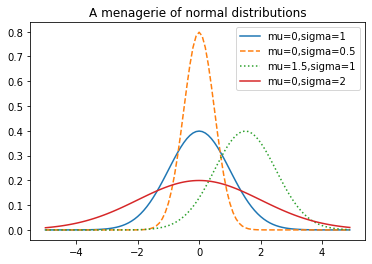

In [45]:
# Let's plot a bunch
xs = [x / 10.0 for x in range(-50,50)]

# Having a normal one
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')

# Same mean, but more concentrated
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs],'--',label='mu=0,sigma=0.5')

# Different mean
plt.plot(xs, [normal_pdf(x,mu=1.5,sigma=1) for x in xs],':',label='mu=1.5,sigma=1')

# a wide boi
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')

plt.legend()
plt.title("A menagerie of normal distributions")

This is good, and useful, but not universally useful, which is why
you often see _cumulative distribution functions_ alongside PDFs


# Cumulative Distribution Functions

If PDFs help us answer "what is the probability of event X occuring?"
CDFs help us answer "what is the probability of X _or lower_ occuring?"

The easiest way to see the difference with with dice:

In [46]:
def die_cdf(c: int) -> float:
    return (c/6) if 1 <= c <= 6 else 0

We can look at the probablities and the cdfs side by side for each possible
roll of a die:

In [47]:
[("Probability of c", "CDF of c")] + [(die_prob(c), die_cdf(c)) for c in range(1,7)]

[('Probability of c', 'CDF of c'),
 (0.16666666666666666, 0.16666666666666666),
 (0.16666666666666666, 0.3333333333333333),
 (0.16666666666666666, 0.5),
 (0.16666666666666666, 0.6666666666666666),
 (0.16666666666666666, 0.8333333333333334),
 (0.16666666666666666, 1.0)]

As you can see the probability doesn't change, it's uniform after all,
but when the question becomes "What's the probability of a die roll of
C _or lower_, the probability accumulates, as you'd expect.

### Exercise

Plot the probability of each roll along with the CDF of each roll as two
lines on a single plot.

## CDFs for continuous distributions

Much like with the PDF, the CDF of the uniform distribution over $[0,1]$ isn't deeply interesting,
but it is _more_ interesting than the PDF.

In [48]:
def uniform_cdf(x: float) -> float:
    if x < 0:   return 0
    elif x < 1: return x
    else:       return 1

As with the PDF, we're going to trust our statistician colleagues when they
say that the following is how you computer the CDF for the normal distribution.

As with the PDF, the formula itself is not the point here, but the intuition
we're gaining for the 'shape' of the CDF as we tweak the various parameters.

We plot the same normal distributions as above:

Text(0.5, 1.0, 'Various Normal cdfs')

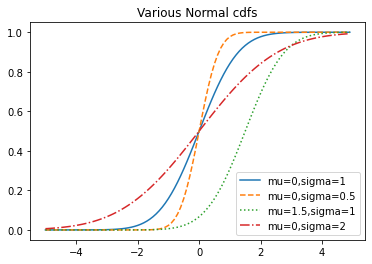

In [49]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / np.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],'--',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=1.5,sigma=1) for x in xs],':',label='mu=1.5,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'-.',label='mu=0,sigma=2')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")

### Exercise

Plot the two things side by side as two plots in a single figure.

# Coin Test

Now we have most of the necessary vocabulary to discuss a simple hypothesis test.

Given a hypothesis, how can we try and figure out of it's 'true' (for some definition of true)?

Here's our hypothesis: The coin is fair.

This means that our Null Hypothesis is: The coin is not fair.

First, ignore the definition of the inverse CDF, it's basically a binary search over the
normal CDF to find the value we care about.

In [50]:
# IGNORE THIS ONE
def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


### Bound to be fun

Now let's get back to the hypothesis test. Because the coin flipping forms a Binomial Distribution, we can approximate it using the Normal Distribution. So represent the distribution that represents $n$ flips of a fair coin ($p = 0.5$), we need a mu and a sigma. Luckily the statisticians gave us a formula for that as well, though this one is a bit easier to reason through (you should try it!)

$\mu = np\\
  \sigma = \sqrt{np(1 - p)}$
  



In [51]:
# The literal translation of the formulas above, just doing them in
# a single function and return a pair with the results
def norm_approx(n: int, p: float) -> Tuple[float, float]:
    mu = p * n
    sigma = np.sqrt(p * (1 - p) * n)
    return mu, sigma

Be definition the CDF is asking about the probability of an event of some value _or lower_ occuring,
but it seems reasonable to ask about the probability of an event of some value _or higher_ occuring. Luckily, that's pretty easy, it's whatever probability is 'left over':

In [52]:
def norm_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
    return 1 - normal_cdf(lo, mu, sigma)

It also seems sensible to ask about the probability of some value _between_ to values occuring.

In [53]:
def norm_between(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def norm_outside(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    return 1 - norm_between(lo, hi, mu, sigma)

The functions above let us ask about the _probability_ of something occuring with
some range (or above, or below). However, it can also be useful to ask "what's the
range where 90% of occurrences happen. (To help you intuit what this is useful,
imagine if someone asked you to circle an area of the globe where 50% of the world
population lives, then 90%, then 95%, are those circles getting bigger or smaller?)

We won't do that all in one go, first we'll do each bound separately:

In [54]:
def norm_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    return inverse_normal_cdf(probability, mu, sigma)

def norm_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    return inverse_normal_cdf(1 - probability, mu, sigma)

Now we can take the upper and lower bounds together to form a two-sided bound.
The only complication is that is we don't want to 'double count' each side of
distribution, so we divide up the probability into 2 and as for the lower bound
of half and the upper bound for half.

_This only works because the normal distribution is symmetrical!_

In [55]:
def norm_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = norm_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = norm_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

Now let's use the functionality we just made.

We want the distribution that represents 1000 coin flips, where each
flip has a probability of 0.5 for success. The assertions are just
there to make sure everything was implemented correctly (since in this
case we _know_ what $\mu$ and $\sigma$ should be).

In [56]:
mu_0, sigma_0 = norm_approx(1000, 0.5)

# Remove these assertions (or comment them out) if you're going to
# play around with the values provided to `norm_approx` above.
assert mu_0 == 500
assert 15.8 < sigma_0 < 15.9

No we get to test our hypothesis! Unfortunately, we have to pick a certain level of certainty that we're comfortable with. So since we have to pick a value, let's define it:

> What is the likelihood that we _accidentally_ reject $H_0$, assuming $H_0$ is true?

This is known as a test's _significance_. Traditionally statisticians and social scientists
(and now data scientists) have chosen 5% as a reasonable value for significance.
There is a lot of debate related to this choice (and it's use in a related measure: p-value).
So while there is nothing inherently wrong with 5%, (or 6%, or 4%...) it's worth taking
a moment to think about _your_ desired significance when performing a hypothesis test.

All that out of that way, we'll use 5% :D

In [57]:
sig = 0.05

lower_bound, upper_bound = norm_two_sided_bounds((1 - sig), mu_0, sigma_0)

In [59]:
(lower_bound, upper_bound)

(469.01026640487555, 530.9897335951244)

Numbers are great, of course, but let's plot the results of our test with different values
of significance:

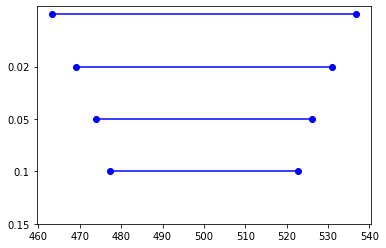

In [82]:
sigs = [0.15, 0.10, 0.05, 0.02]

for i,sig in enumerate(sigs, start=1):
    l,u = norm_two_sided_bounds((1 - sig), mu_0, sigma_0)
    plt.plot((l,u),(i,i),'ro-',color='blue')
    

plt.yticks(range(len(sigs)),map(str,sigs))
    
plt.show()


#for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
#    plt.plot((lower,upper),(y,y),'ro-',color='orange')
#plt.yticks(range(len(dataset)),list(dataset['category']))

In [68]:
list(enumerate(sigs))

[(0, 0.15), (1, 0.1), (2, 0.05), (3, 0.02), (4, 0.01)]